# Pokémon Competitive Usage EDA

In this notebook, we explore patterns in competitive usage across generations and attributes like stats, types, and evolution chains.


## 1. Setup and Data Loading
Connect to the PostgreSQL database and load relevant tables into pandas DataFrames.


In [13]:
import pandas as pd
import psycopg2
from dotenv import load_dotenv
import os

# Load environment variables
load_dotenv()

# Connect to DB
conn = psycopg2.connect(
    dbname=os.getenv("DB_NAME"),
    user=os.getenv("DB_USER"),
    password=os.getenv("DB_PASSWORD"),
    host=os.getenv("DB_HOST"),
    port=os.getenv("DB_PORT")
)

# Load competitive usage data
usage_df = pd.read_sql("SELECT * FROM pokemon_competitive_usage;", conn)
usage_df.head()


/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/3035828512.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  usage_df = pd.read_sql("SELECT * FROM pokemon_competitive_usage;", conn)


,id,pokemon_id,smogon_vgc_usage_2022,smogon_vgc_usage_2023,smogon_vgc_usage_2024,worlds_vgc_usage_2022,worlds_vgc_usage_2023,worlds_vgc_usage_2024
0,1,620,0.02136,1.62952,0.06627,NaN,0.19,NaN
1,2,621,NaN,NaN,NaN,NaN,NaN,NaN
2,3,93,0.00000,NaN,NaN,NaN,NaN,NaN
3,4,496,0.00000,NaN,NaN,NaN,NaN,NaN
4,5,497,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Basic Data Overview

We'll start by checking for null values, basic distributions, and the structure of the data.


In [14]:
usage_df.info()
usage_df.describe()
usage_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1238 entries, 0 to 1237
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1238 non-null   int64  
 1   pokemon_id             1238 non-null   int64  
 2   smogon_vgc_usage_2022  684 non-null    float64
 3   smogon_vgc_usage_2023  603 non-null    float64
 4   smogon_vgc_usage_2024  765 non-null    float64
 5   worlds_vgc_usage_2022  153 non-null    float64
 6   worlds_vgc_usage_2023  142 non-null    float64
 7   worlds_vgc_usage_2024  179 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 77.5 KB


id                          0
pokemon_id                  0
smogon_vgc_usage_2022     554
smogon_vgc_usage_2023     635
smogon_vgc_usage_2024     473
worlds_vgc_usage_2022    1085
worlds_vgc_usage_2023    1096
worlds_vgc_usage_2024    1059
dtype: int64

## 3. Trends Over Time

Let’s examine how competitive usage has changed over the years.


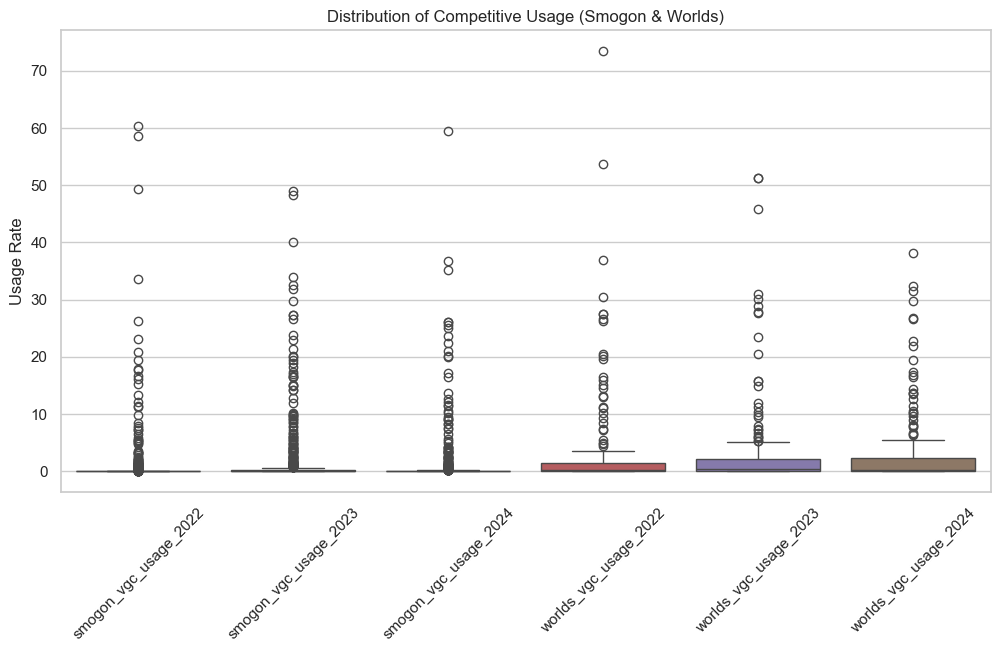

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

usage_cols = [col for col in usage_df.columns if "usage" in col]

plt.figure(figsize=(12, 6))
sns.boxplot(data=usage_df[usage_cols])
plt.title("Distribution of Competitive Usage (Smogon & Worlds)")
plt.xticks(rotation=45)
plt.ylabel("Usage Rate")
plt.show()


## 🧠 Top Competitive Pokémon Usage Trends (2022–2024)

In this section, we explore which Pokémon were most used competitively in official Smogon VGC formats over the past three years. We’ll visualize the top 10 most-used Pokémon for each year and examine trends over time.


In [16]:
query = """
SELECT 
    u.pokemon_id,
    p.pokemon_name,
    p.alternate_form_name,
    u.smogon_vgc_usage_2022,
    u.smogon_vgc_usage_2023,
    u.smogon_vgc_usage_2024,
    u.worlds_vgc_usage_2022,
    u.worlds_vgc_usage_2023,
    u.worlds_vgc_usage_2024
FROM 
    pokemon_competitive_usage u
JOIN 
    pokemon p ON u.pokemon_id = p.id
"""
usage_df = pd.read_sql(query, conn)

# Combine name and form into a label (e.g., "Charizard (Gmax)")
usage_df["label"] = usage_df.apply(
    lambda row: f"{row['pokemon_name']} ({row['alternate_form_name']})"
    if pd.notna(row['alternate_form_name']) else row['pokemon_name'],
    axis=1
)


/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/3831638721.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  usage_df = pd.read_sql(query, conn)


### 🧪 How the data is prepared

We join the `pokemon_competitive_usage` table with the `pokemon` table to retrieve Pokémon names and their alternate forms. If a Pokémon has an alternate form, it is appended to the label in parentheses.

The usage data includes:
- `smogon_vgc_usage_2022`
- `smogon_vgc_usage_2023`
- `smogon_vgc_usage_2024`


/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/1069518072.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/1069518072.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/1069518072.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


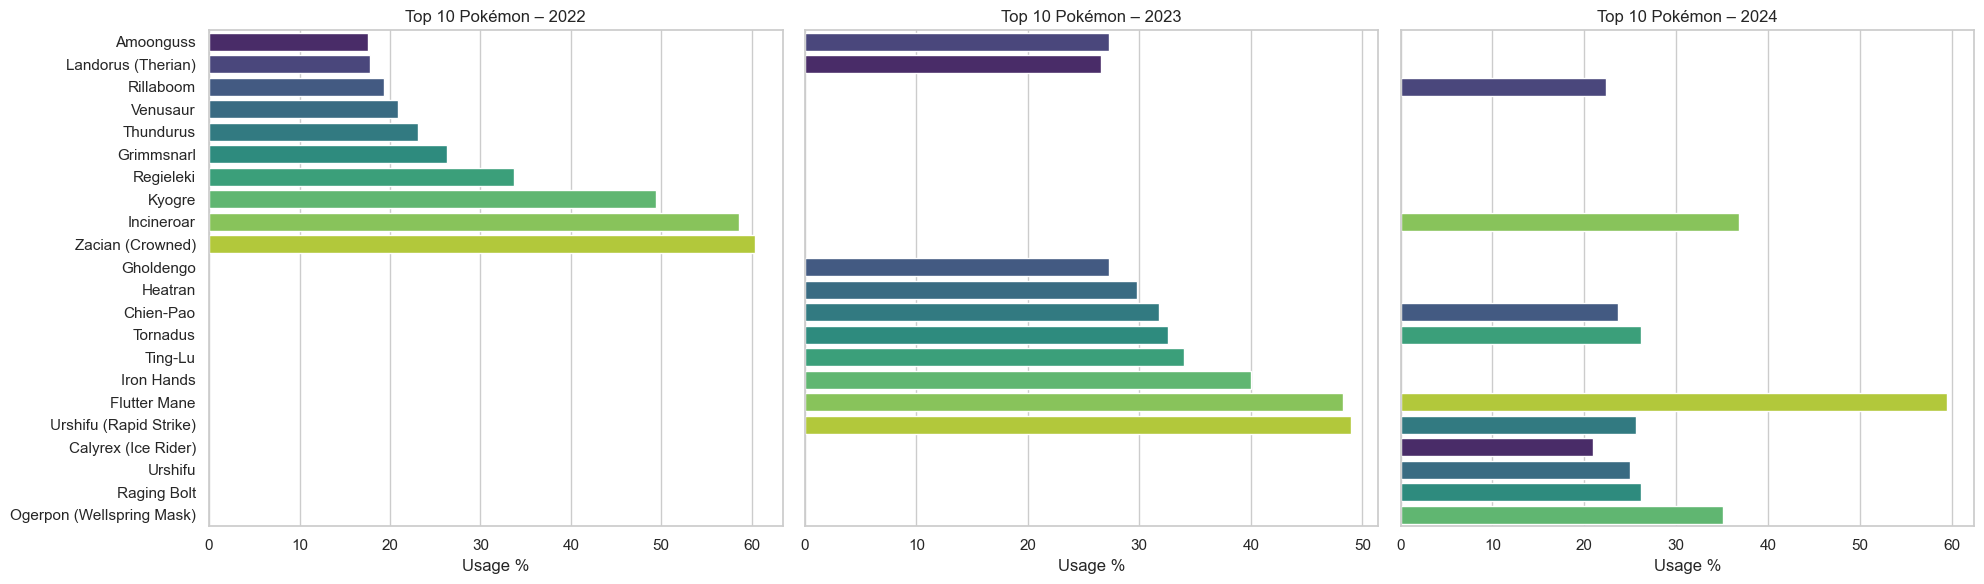

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn
sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

years = ["2022", "2023", "2024"]

for i, year in enumerate(years):
    col = f"smogon_vgc_usage_{year}"
    top10 = usage_df.nlargest(10, col)[["label", col]].sort_values(col)
    
    sns.barplot(
        data=top10,
        x=col,
        y="label",
        ax=axs[i],
        palette="viridis"
    )
    
    axs[i].set_title(f"Top 10 Pokémon – {year}")
    axs[i].set_xlabel("Usage %")
    axs[i].set_ylabel("")

plt.tight_layout()
plt.show()


## 🌍 Top Pokémon Used in World Championships (2022–2024)

Now we’ll look at the Pokémon that were most used in official **Worlds VGC** formats, according to the dataset. These represent usage data from the Pokémon World Championships metagames.


/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/2019900929.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/2019900929.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/2019900929.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


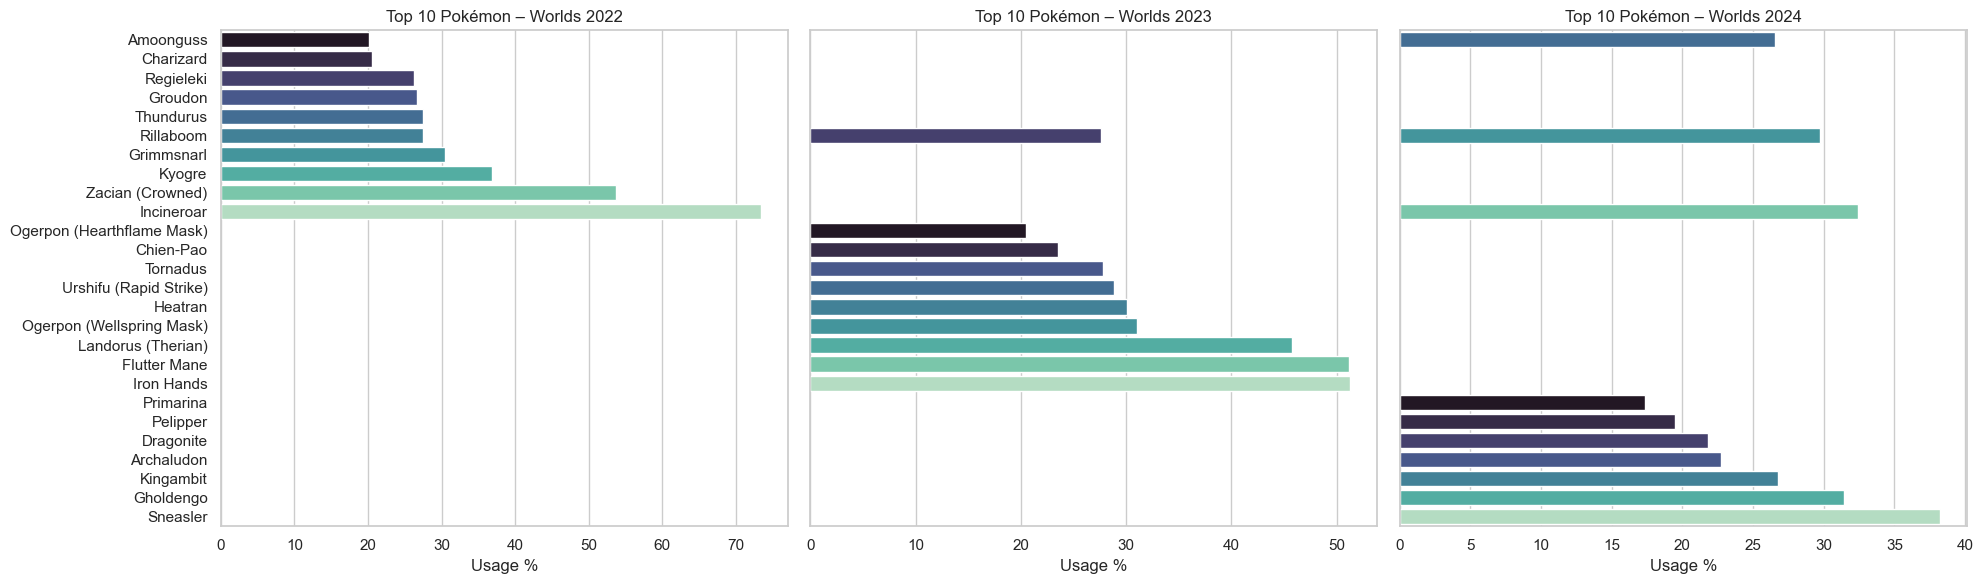

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

worlds_years = ["2022", "2023", "2024"]

for i, year in enumerate(worlds_years):
    col = f"worlds_vgc_usage_{year}"
    top10 = usage_df.nlargest(10, col)[["label", col]].sort_values(col)

    sns.barplot(
        data=top10,
        x=col,
        y="label",
        ax=axs[i],
        palette="mako"
    )

    axs[i].set_title(f"Top 10 Pokémon – Worlds {year}")
    axs[i].set_xlabel("Usage %")
    axs[i].set_ylabel("")

plt.tight_layout()
plt.show()


## 🔄 Comparing Smogon and Worlds Usage

Let’s now compare the usage percentages for **Smogon VGC vs. Worlds VGC** for the top 10 Pokémon in **2024** to see how competitive metagames differ across formats.


/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/1288481481.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/rohanhangal/PersonalProjects/data_engineering/pokemon_project/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


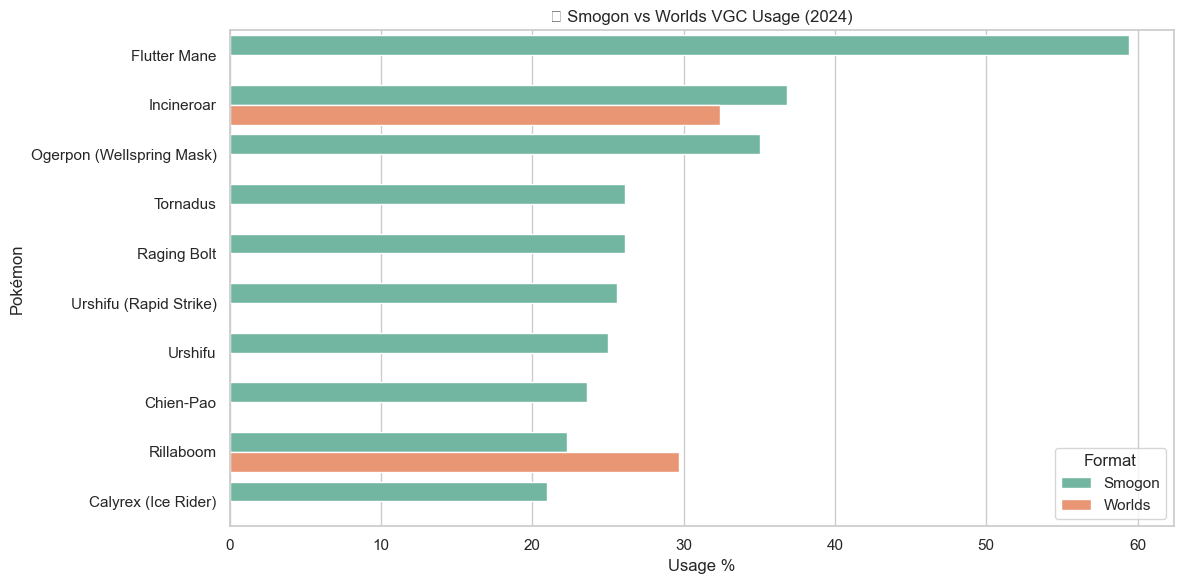

In [19]:
# Get top 10 most-used Pokémon in 2024 based on Smogon usage
top10_2024 = usage_df.nlargest(10, "smogon_vgc_usage_2024")[["label", "smogon_vgc_usage_2024", "worlds_vgc_usage_2024"]]

# Melt into long format for Seaborn grouped barplot
comparison_df = top10_2024.melt(id_vars="label", 
                                 value_vars=["smogon_vgc_usage_2024", "worlds_vgc_usage_2024"],
                                 var_name="Format", value_name="Usage")

# Clean up format names
comparison_df["Format"] = comparison_df["Format"].str.replace("smogon_vgc_usage_2024", "Smogon")
comparison_df["Format"] = comparison_df["Format"].str.replace("worlds_vgc_usage_2024", "Worlds")

plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x="Usage", y="label", hue="Format", palette="Set2")
plt.title("📊 Smogon vs Worlds VGC Usage (2024)")
plt.xlabel("Usage %")
plt.ylabel("Pokémon")
plt.legend(title="Format")
plt.tight_layout()
plt.show()


## 📊 Top 10 Pokémon by Competitive Usage — Smogon vs Worlds (2022–2024)

This chart compares the top 10 most used Pokémon in Smogon and Worlds VGC formats for each year side by side. It helps highlight which Pokémon are favored differently across formats and how trends shift year over year.


/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/295241348.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/295241348.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/295241348.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/ht/dp3tdfgs34g1r1j0jdjb1qq40000gn/T/ipykernel_33782/295241348.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

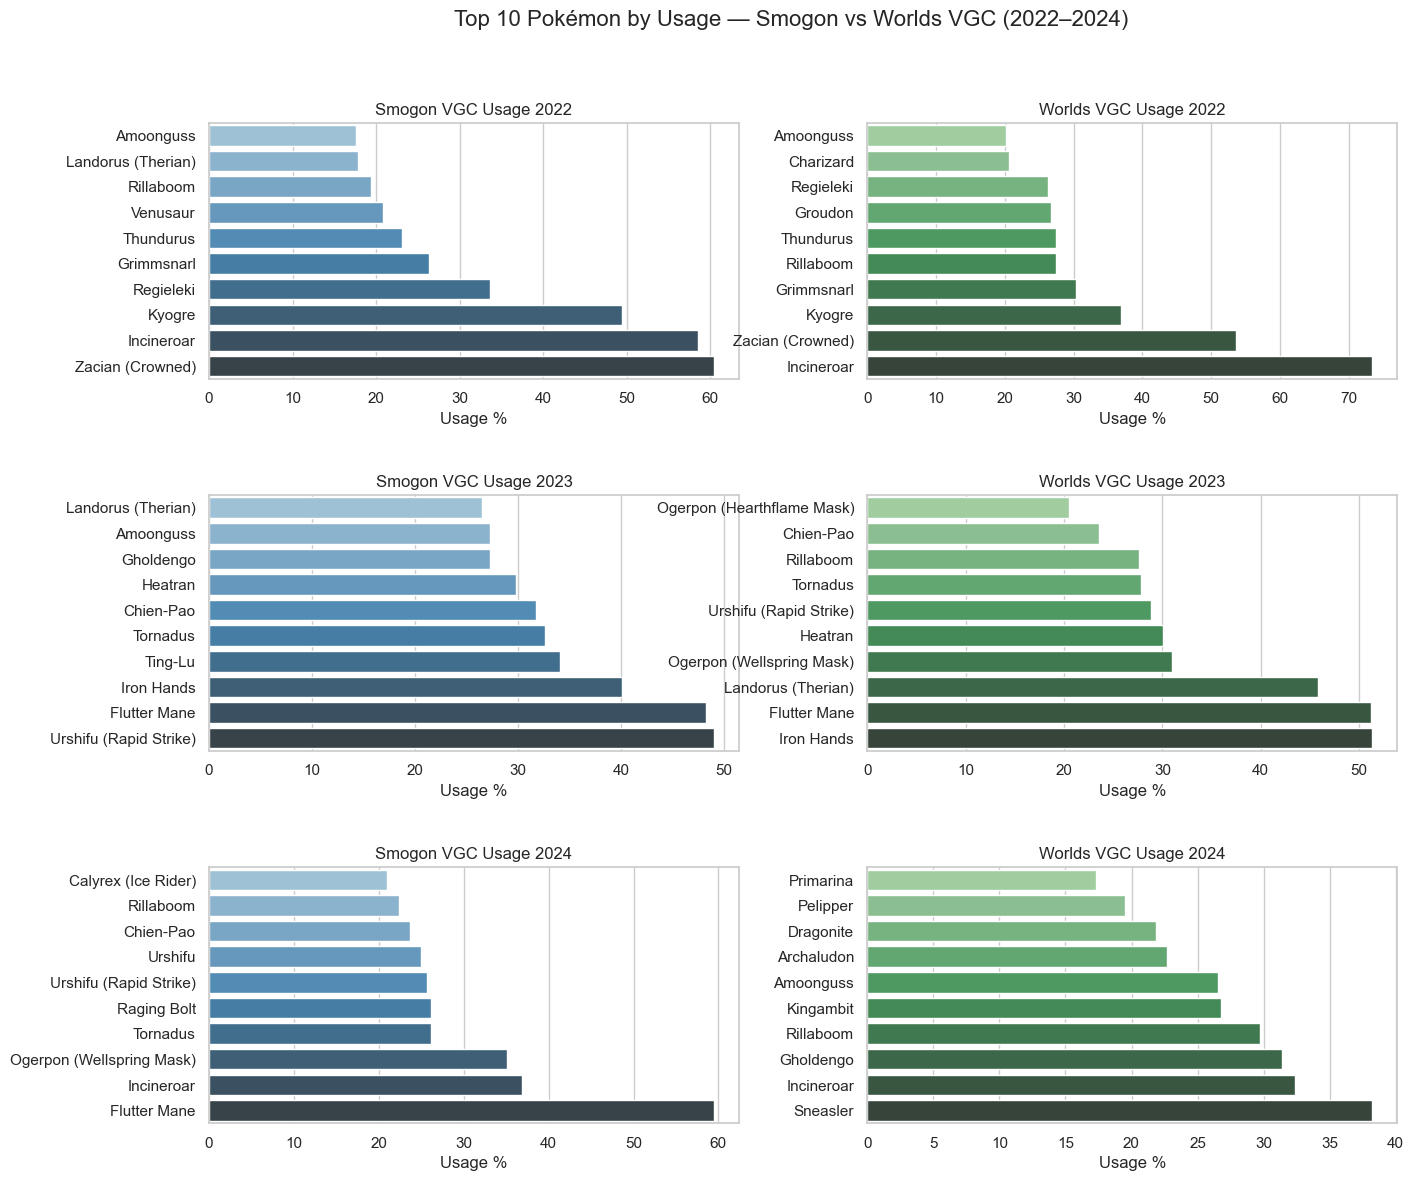

In [20]:
years = [2022, 2023, 2024]
fig, axes = plt.subplots(len(years), 2, figsize=(14, 12))
fig.tight_layout(pad=5)
fig.suptitle("Top 10 Pokémon by Usage — Smogon vs Worlds VGC (2022–2024)", fontsize=16, y=1.02)

for i, year in enumerate(years):
    smogon_col = f"smogon_vgc_usage_{year}"
    worlds_col = f"worlds_vgc_usage_{year}"

    smogon_top10 = usage_df.nlargest(10, smogon_col)[["label", smogon_col]].sort_values(smogon_col)
    worlds_top10 = usage_df.nlargest(10, worlds_col)[["label", worlds_col]].sort_values(worlds_col)

    # Smogon subplot
    sns.barplot(
        ax=axes[i, 0],
        data=smogon_top10,
        x=smogon_col,
        y="label",
        palette="Blues_d"
    )
    axes[i, 0].set_title(f"Smogon VGC Usage {year}")
    axes[i, 0].set_xlabel("Usage %")
    axes[i, 0].set_ylabel("")

    # Worlds subplot
    sns.barplot(
        ax=axes[i, 1],
        data=worlds_top10,
        x=worlds_col,
        y="label",
        palette="Greens_d"
    )
    axes[i, 1].set_title(f"Worlds VGC Usage {year}")
    axes[i, 1].set_xlabel("Usage %")
    axes[i, 1].set_ylabel("")

plt.show()


## 📊 Side-by-Side Comparison — Smogon vs Worlds VGC Usage (2022–2024)

Each bar plot below shows the top 10 most used Pokémon for a given year, comparing **Smogon** and **Worlds** usage side-by-side. This helps identify format-specific meta trends and Pokémon that dominate one scene more than the other.


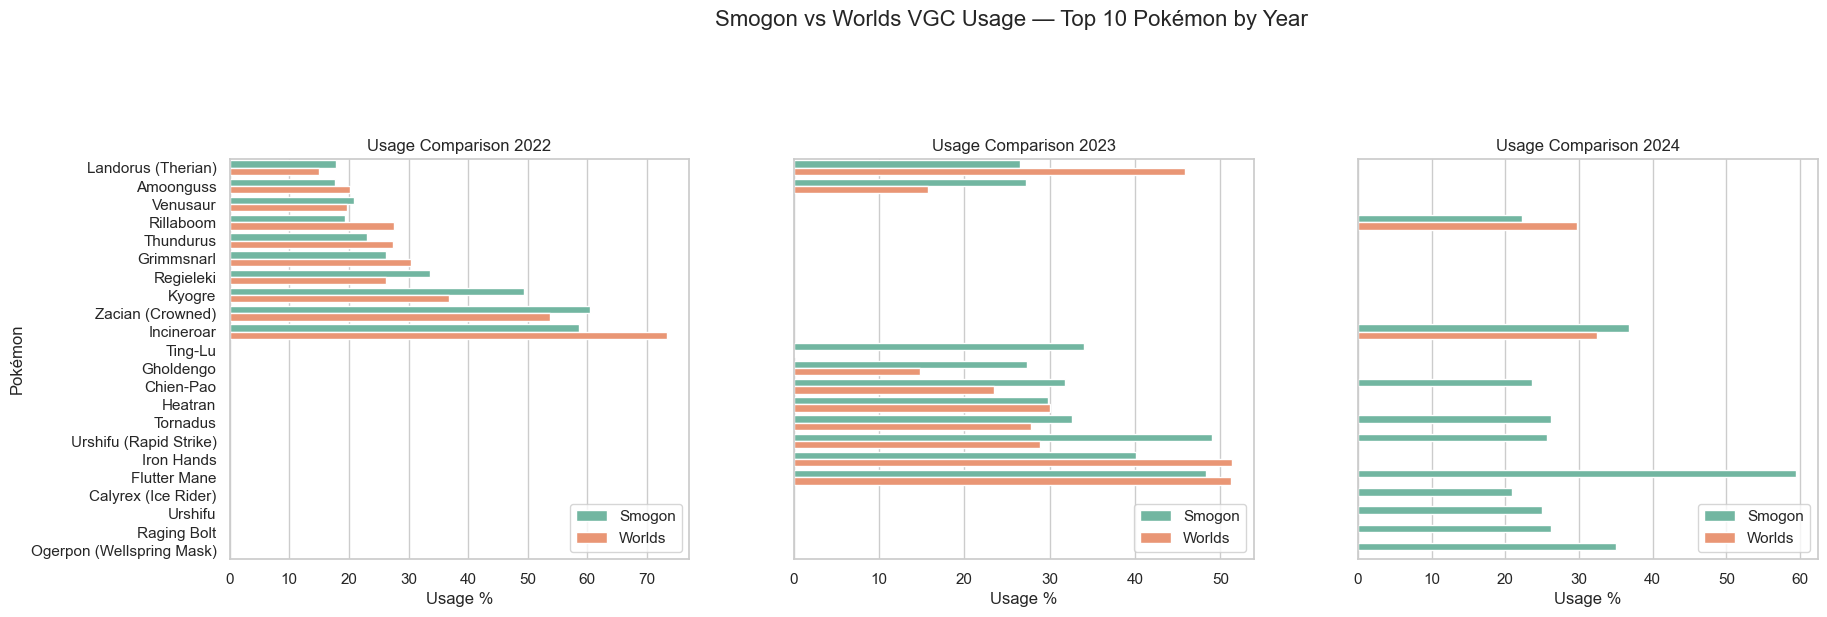

In [21]:
years = [2022, 2023, 2024]
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.tight_layout(pad=5)
fig.suptitle("Smogon vs Worlds VGC Usage — Top 10 Pokémon by Year", fontsize=16, y=1.1)

for i, year in enumerate(years):
    smogon_col = f"smogon_vgc_usage_{year}"
    worlds_col = f"worlds_vgc_usage_{year}"

    smogon_top10 = usage_df.nlargest(10, smogon_col)[["label", smogon_col]]
    worlds_subset = usage_df[usage_df["label"].isin(smogon_top10["label"])][["label", worlds_col]]

    # Merge and melt for plotting
    merged = pd.merge(smogon_top10, worlds_subset, on="label")
    melted = pd.melt(merged, id_vars="label", value_vars=[smogon_col, worlds_col],
                     var_name="Format", value_name="Usage")

    # Clean format names
    melted["Format"] = melted["Format"].str.extract(r'(smogon|worlds)')[0].str.capitalize()

    # Sort labels by average usage for consistent y-axis
    melted["label"] = pd.Categorical(
        melted["label"],
        categories=melted.groupby("label")["Usage"].mean().sort_values().index,
        ordered=True
    )

    sns.barplot(
        ax=axes[i],
        data=melted,
        x="Usage",
        y="label",
        hue="Format",
        palette="Set2"
    )
    axes[i].set_title(f"Usage Comparison {year}")
    axes[i].set_xlabel("Usage %")
    axes[i].set_ylabel("" if i > 0 else "Pokémon")
    axes[i].legend(loc="lower right")

plt.show()


## 🔄 Top 10 Smogon + Top 10 Worlds — Competitive Usage Comparison (2022–2024)

For each year, we show a **combined list of Pokémon** that appear in either the **top 10 for Smogon** or **top 10 for Worlds**. If there’s overlap, fewer than 20 Pokémon are shown. This approach ensures that high performers in *either* format are visualized side-by-side.


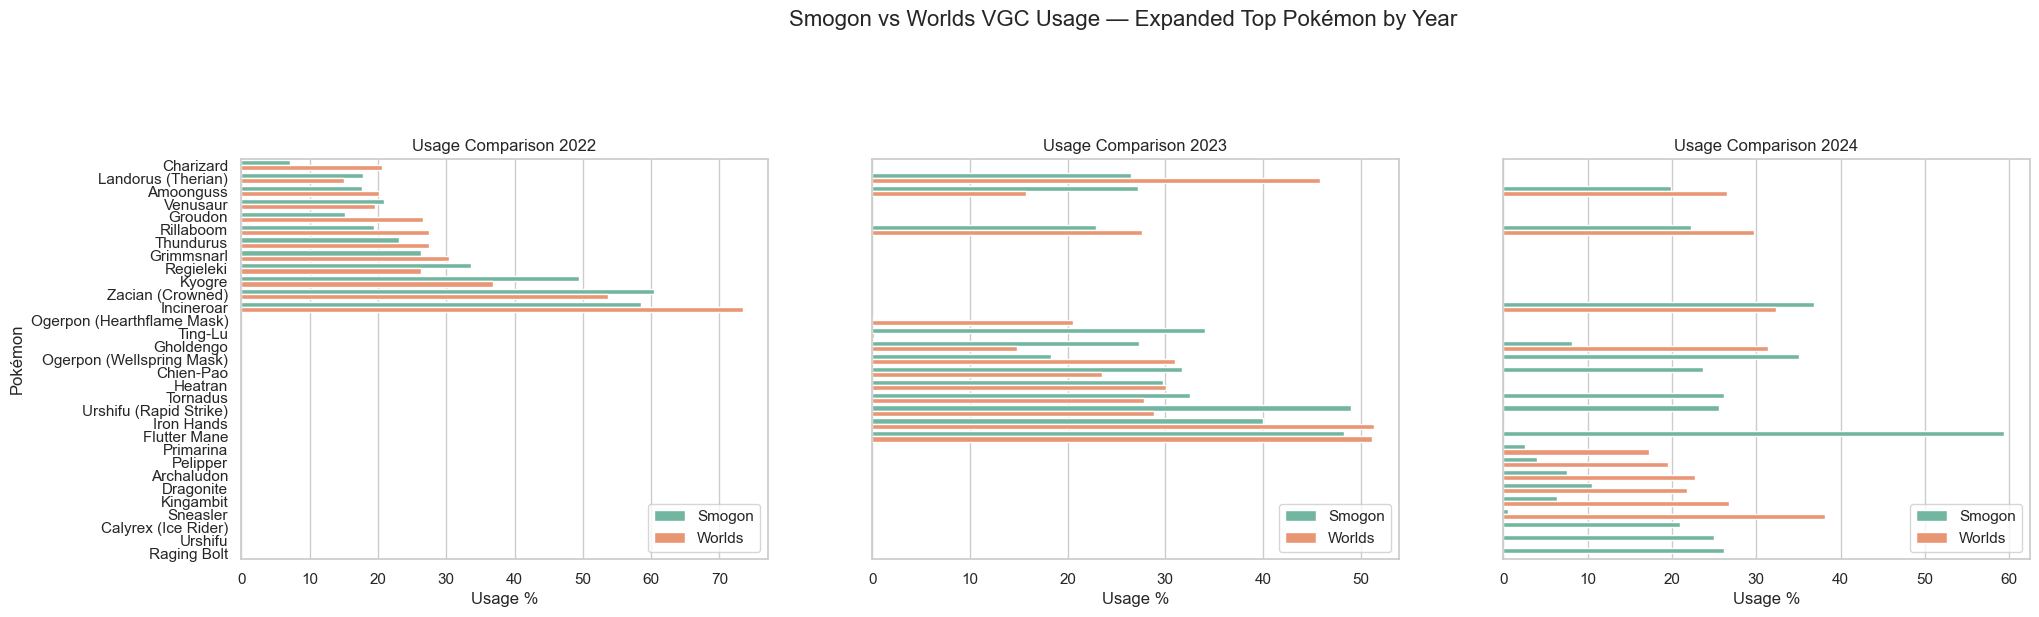

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

years = [2022, 2023, 2024]
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.tight_layout(pad=5)
fig.suptitle("Smogon vs Worlds VGC Usage — Expanded Top Pokémon by Year", fontsize=16, y=1.1)

for i, year in enumerate(years):
    smogon_col = f"smogon_vgc_usage_{year}"
    worlds_col = f"worlds_vgc_usage_{year}"

    # Get top 10 for each source
    top10_smogon = usage_df.nlargest(10, smogon_col)[["label", smogon_col]]
    top10_worlds = usage_df.nlargest(10, worlds_col)[["label", worlds_col]]

    # Merge top 10 from both formats by name
    unique_labels = pd.Series(top10_smogon["label"].tolist() + top10_worlds["label"].tolist()).drop_duplicates()

    filtered = usage_df[usage_df["label"].isin(unique_labels)][["label", smogon_col, worlds_col]].copy()

    # Melt for plotting
    melted = pd.melt(filtered, id_vars="label", value_vars=[smogon_col, worlds_col],
                     var_name="Format", value_name="Usage")
    
    melted["Format"] = melted["Format"].str.extract(r'(smogon|worlds)')[0].str.capitalize()

    # Sort labels by average usage
    melted["label"] = pd.Categorical(
        melted["label"],
        categories=melted.groupby("label")["Usage"].mean().sort_values().index,
        ordered=True
    )

    sns.barplot(
        ax=axes[i],
        data=melted,
        x="Usage",
        y="label",
        hue="Format",
        palette="Set2"
    )
    axes[i].set_title(f"Usage Comparison {year}")
    axes[i].set_xlabel("Usage %")
    axes[i].set_ylabel("" if i > 0 else "Pokémon")
    axes[i].legend(loc="lower right")

plt.show()
